## Importing important Libraries

In [1]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

# For modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Loding The Dataset 

In [2]:
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Sanity Checks

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Checking For Missing Values

In [5]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Pre Processing Data

### Dropping Unessary Columns

In [6]:
df1=df.drop(['instant','dteday','casual', 'registered'], axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
df1.shape

(730, 12)

### We can infer from the data that "season," "yr," "mnth," "holiday," "weekday," "workingday," and "weathersit" are all categorical variables.

### We shall substitute the relevant values for "season," "weekday," and "weathersit."


In [8]:
# Mapping season column
df1['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [9]:
# Mapping mnth column
df1['mnth'].replace({1:"January",2:"Feburary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",
                    9:"September",10:"October",11:"November",12:"December"},inplace=True)

In [10]:
# Mapping weekday column
df1['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [11]:
# Mapping weathersit column
df1['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",
                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [12]:
# check the head of the dataset after mapping the categorical columns
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis

In [13]:
df1.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [14]:
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols=['temp','atemp','hum','windspeed']
target=['cnt']
len(cat_cols)+len(cont_cols)+len(target)

12

## Univariate Analysis

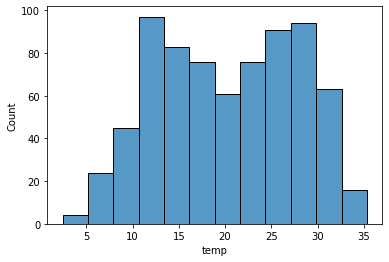

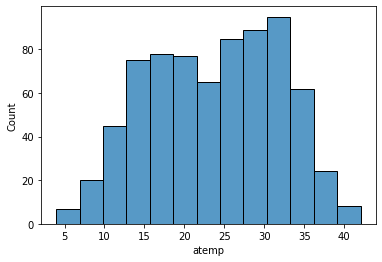

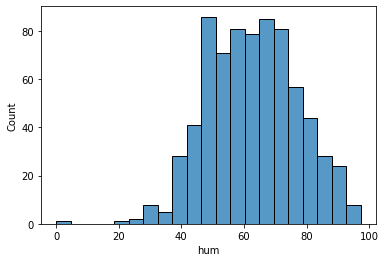

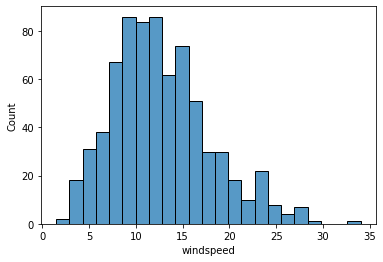

In [15]:
for i in cont_cols:
    sns.histplot(df1[i])
    plt.show()

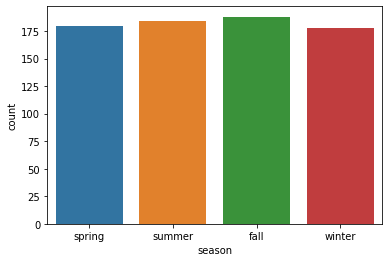

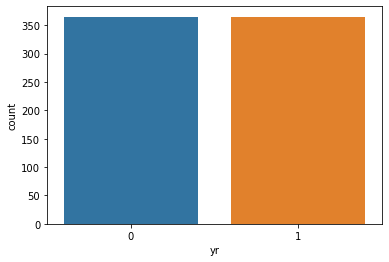

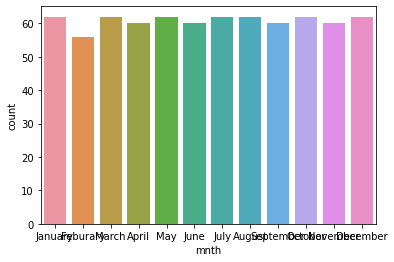

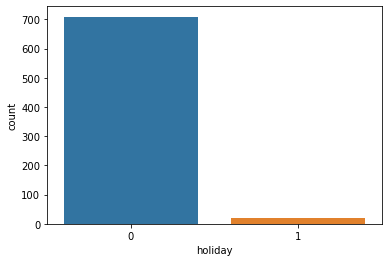

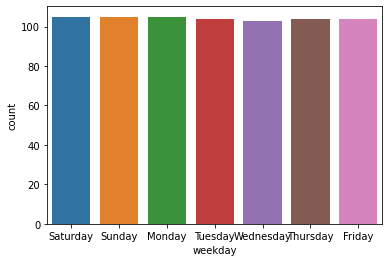

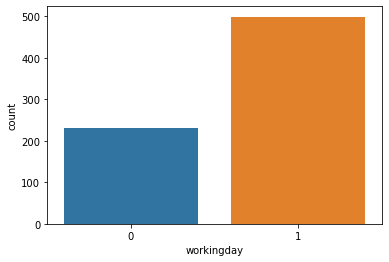

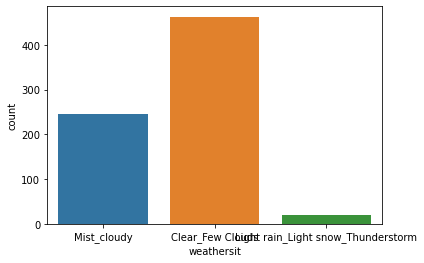

In [16]:
for i in cat_cols:
    sns.countplot(x=df1[i])
    plt.show()

## Bivariate Analysis

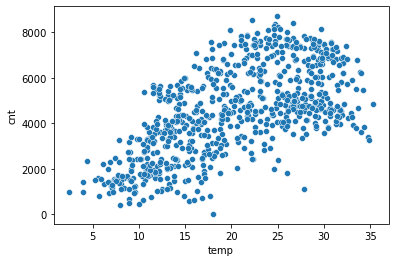

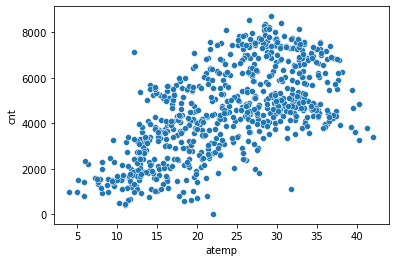

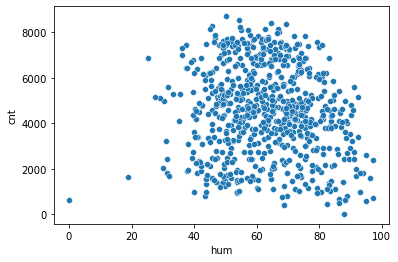

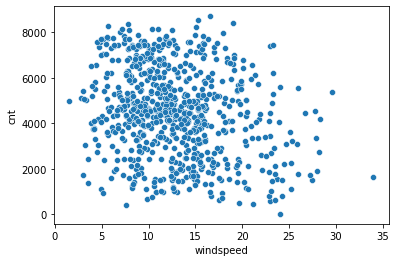

In [17]:
for i in cont_cols:
    sns.scatterplot(x=df1[i],y=df1["cnt"])
    plt.show()

## Multrivate Analysis

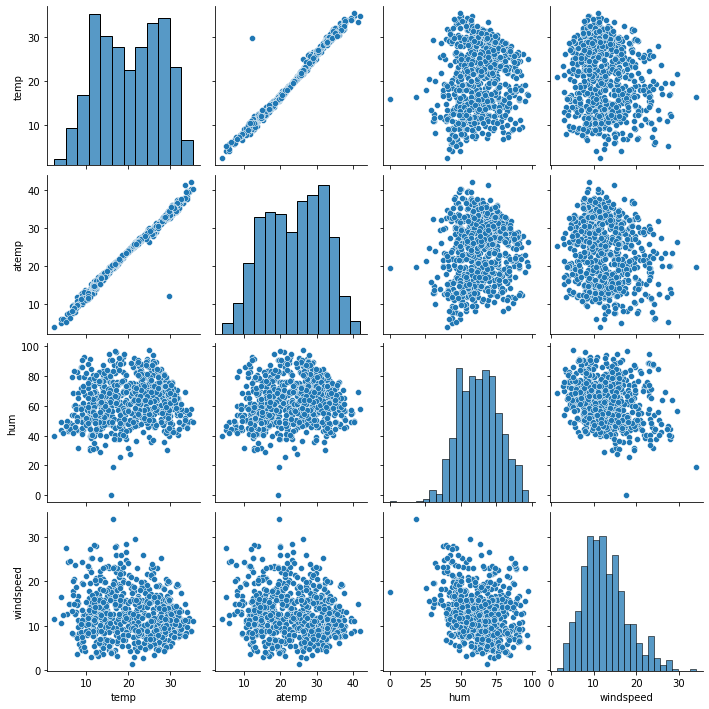

In [18]:
sns.pairplot(df1[cont_cols])
plt.show()

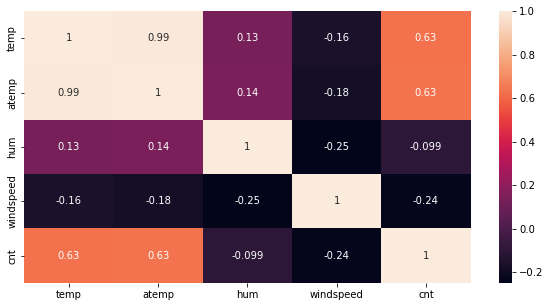

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df1[cont_cols+["cnt"]].corr(),annot=True)
plt.show()

### Dummy Variable Creation

In [20]:
# Only for non binary categorical columns
df1[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [21]:
#Dummy variables for season, mnth, weekday, weathersit
dum1=pd.get_dummies(df1.season,drop_first=True)
dum2=pd.get_dummies(df1.mnth,drop_first=True)
dum3=pd.get_dummies(df1.weekday,drop_first=True)
dum4=pd.get_dummies(df1.weathersit,drop_first=True)

In [22]:
# Combining the results to dataframe
bike=pd.concat([dum1,dum2,dum3,dum4,df1],axis=1)
bike.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,January,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,January,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,January,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,January,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,January,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# Drop 'season','mnth','weekday','weathersit' 
bike.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


## Train Test Split

In [24]:
x=bike.drop(["cnt"],axis=1)
y=bike["cnt"]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [26]:
x_train.shape

(511, 29)

In [27]:
x_test.shape

(219, 29)

## Scaling Data

In [28]:
#Instantiate an object
scaler = MinMaxScaler()

In [29]:
x_train[cont_cols] = scaler.fit_transform(x_train[cont_cols])
x_train.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475


In [30]:
x_test[cont_cols] = scaler.fit_transform(x_test[cont_cols])

## Modelling

### Feature Selection - Recursive Feature Eimination

In [31]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(x_train,y_train)
selected_features=list(x_train.columns[selector.support_])
selected_features

['spring',
 'summer',
 'winter',
 'January',
 'July',
 'September',
 'Saturday',
 'Light rain_Light snow_Thunderstorm',
 'Mist_cloudy',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed']

In [32]:
x_train=x_train[selected_features]
x_test=x_test[selected_features]

In [33]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [34]:
model1=sm.OLS(y_train,x_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.50e-191
Time:                        16:58:02   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2206.7691    314.541      7.016      0.000    1588.770    2824.769
spring                              -439.3779    179.750     -2.444      0.015    -792.545     -86.211
summer                               442.3136    129.046      3.428      0.001     188.768     695.859
winter                               823.3397    150.044      5.487      0.000     528.538    1118.142
January                             -298.4753    150.964     -1.977      0.049    -595.085      -1.865
July                                -461.8136    157.127     -2.939      0.003    -770.531    -153.096
September                            705.8967    143.243      4.928      0.000     424.457     987.336
Saturday                             466.0363    126.162      3.694      0.000     218.158     713.914
Light rain_Light snow_Thunderstorm -2154.6073    226.496     -9.513      0.000   -2599.620   -1709.594
Mist_cloudy                         -492.1456     90.091     -5.463      0.000    -669.154    -315.137
yr                                  2007.6643     69.617     28.839      0.000    1870.884    2144.445
holiday                             -506.7813    233.946     -2.166      0.031    -966.431     -47.132
workingday                           380.7061    100.209      3.799      0.000     183.819     577.594
temp                                4437.9745    298.850     14.850      0.000    3850.804    5025.145
hum                                -1366.6057    324.706     -4.209      0.000   -2004.578    -728.633
windspeed                          -1619.1366    221.733     -7.302      0.000   -2054.791   -1183.482
==============================================================================
Omnibus:                       66.238   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.707
Skew:                          -0.677   Prob(JB):                     2.09e-35
Kurtosis:                       5.381   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variance Inflation Factor

In [35]:
# Generic function to calculate VIF of variables

def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [36]:
cal_VIF(x_train)

,Features,VIF
13,hum,29.39
12,temp,17.80
11,workingday,5.32
14,windspeed,4.73
0,spring,4.53
2,winter,3.48
1,summer,2.85
8,Mist_cloudy,2.29
9,yr,2.09
6,Saturday,1.98


In [37]:
x_train=x_train.drop(["hum"],axis=1)
x_test=x_test.drop(["hum"],axis=1)

In [38]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [39]:
model2=sm.OLS(y_train,x_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          6.18e-189
Time:                        16:58:02   Log-Likelihood:                -4123.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1522.3973    273.747      5.561      0.000     984.550    2060.244
spring                              -517.8708    181.767     -2.849      0.005    -874.999    -160.743
summer                               387.6602    130.536      2.970      0.003     131.188     644.133
winter                               693.3129    149.282      4.644      0.000     400.009     986.617
January                             -339.3758    153.168     -2.216      0.027    -640.315     -38.437
July                                -417.7679    159.397     -2.621      0.009    -730.945    -104.591
September                            654.0040    145.096      4.507      0.000     368.926     939.082
Saturday                             507.6340    127.875      3.970      0.000     256.390     758.878
Light rain_Light snow_Thunderstorm -2533.7977    211.278    -11.993      0.000   -2948.909   -2118.687
Mist_cloudy                         -710.4234     74.897     -9.485      0.000    -857.578    -563.269
yr                                  2042.2594     70.285     29.057      0.000    1904.167    2180.352
holiday                             -485.9446    237.801     -2.043      0.042    -953.167     -18.722
workingday                           407.3465    101.680      4.006      0.000     207.570     607.123
temp                                4111.1718    293.408     14.012      0.000    3534.696    4687.647
windspeed                          -1356.7226    216.342     -6.271      0.000   -1781.782    -931.663
==============================================================================
Omnibus:                       67.777   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.366
Skew:                          -0.690   Prob(JB):                     2.03e-36
Kurtosis:                       5.411   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
cal_VIF(x_train)

,Features,VIF
12,temp,7.08
11,workingday,5.26
13,windspeed,4.68
0,spring,3.07
1,summer,2.34
9,yr,2.08
2,winter,1.99
6,Saturday,1.97
3,January,1.62
4,July,1.59


In [41]:
x_train=x_train.drop(["temp"],axis=1)
x_test=x_test.drop(["temp"],axis=1)

In [42]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [43]:
model3=sm.OLS(y_train,x_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          2.72e-154
Time:                        16:58:02   Log-Likelihood:                -4209.0
No. Observations:                 511   AIC:                             8446.
Df Residuals:                     497   BIC:                             8505.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4749.3035    174.662     27.191      0.000    4406.136    5092.470
spring                             -2261.8719    156.345    -14.467      0.000   -2569.050   -1954.694
summer                              -371.6487    140.164     -2.652      0.008    -647.035     -96.262
winter                              -650.8845    134.995     -4.822      0.000    -916.115    -385.654
January                             -891.5391    174.693     -5.103      0.000   -1234.768    -548.311
July                                 -84.1391    186.020     -0.452      0.651    -449.621     281.343
September                            615.0744    171.220      3.592      0.000     278.671     951.478
Saturday                             489.8579    150.919      3.246      0.001     193.340     786.376
Light rain_Light snow_Thunderstorm -2644.4012    249.190    -10.612      0.000   -3133.996   -2154.806
Mist_cloudy                         -771.1535     88.250     -8.738      0.000    -944.543    -597.764
yr                                  2158.9113     82.370     26.210      0.000    1997.074    2320.748
holiday                             -493.8409    280.667     -1.760      0.079   -1045.282      57.600
workingday                           420.6103    120.004      3.505      0.000     184.833     656.388
windspeed                          -1631.1631    254.292     -6.415      0.000   -2130.783   -1131.544
==============================================================================
Omnibus:                       34.828   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.623
Skew:                          -0.424   Prob(JB):                     3.41e-15
Kurtosis:                       4.552   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
x_train=x_train.drop(["July"],axis=1)
x_test=x_test.drop(["July"],axis=1)

In [45]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [46]:
model4=sm.OLS(y_train,x_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.6
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          2.42e-155
Time:                        16:58:02   Log-Likelihood:                -4209.1
No. Observations:                 511   AIC:                             8444.
Df Residuals:                     498   BIC:                             8499.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4716.3482    158.613     29.735      0.000    4404.715    5027.981
spring                             -2231.8732    141.467    -15.777      0.000   -2509.819   -1953.927
summer                              -341.8570    123.625     -2.765      0.006    -584.749     -98.965
winter                              -622.5608    119.497     -5.210      0.000    -857.341    -387.781
January                             -891.9283    174.552     -5.110      0.000   -1234.877    -548.980
September                            638.5352    163.044      3.916      0.000     318.196     958.874
Saturday                             491.0818    150.774      3.257      0.001     194.850     787.314
Light rain_Light snow_Thunderstorm -2645.4825    248.979    -10.625      0.000   -3134.662   -2156.303
Mist_cloudy                         -768.4698     87.980     -8.735      0.000    -941.327    -595.612
yr                                  2159.2144     82.302     26.235      0.000    1997.513    2320.916
holiday                             -490.1720    280.326     -1.749      0.081   -1040.939      60.595
workingday                           422.7531    119.814      3.528      0.000     187.349     658.157
windspeed                          -1630.4132    254.083     -6.417      0.000   -2129.620   -1131.206
==============================================================================
Omnibus:                       34.958   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.552
Skew:                          -0.427   Prob(JB):                     3.54e-15
Kurtosis:                       4.548   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
x_train=x_train.drop(["holiday"],axis=1)
x_test=x_test.drop(["holiday"],axis=1)

In [48]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [49]:
model4=sm.OLS(y_train,x_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     160.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          8.52e-156
Time:                        16:58:02   Log-Likelihood:                -4210.7
No. Observations:                 511   AIC:                             8445.
Df Residuals:                     499   BIC:                             8496.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4651.2646    154.501     30.105      0.000    4347.711    4954.818
spring                             -2243.1276    141.612    -15.840      0.000   -2521.356   -1964.899
summer                              -342.5223    123.879     -2.765      0.006    -585.912     -99.133
winter                              -633.6558    119.574     -5.299      0.000    -868.586    -398.725
January                             -897.0311    174.887     -5.129      0.000   -1240.636    -553.426
September                            619.1925    163.003      3.799      0.000     298.935     939.450
Saturday                             564.5428    145.101      3.891      0.000     279.458     849.627
Light rain_Light snow_Thunderstorm -2635.2426    249.423    -10.565      0.000   -3125.291   -2145.194
Mist_cloudy                         -764.2917     88.129     -8.672      0.000    -937.441    -591.143
yr                                  2160.8331     82.466     26.203      0.000    1998.810    2322.857
workingday                           495.2774    112.638      4.397      0.000     273.974     716.581
windspeed                          -1639.0134    254.559     -6.439      0.000   -2139.153   -1138.874
==============================================================================
Omnibus:                       39.640   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.800
Skew:                          -0.462   Prob(JB):                     4.70e-18
Kurtosis:                       4.701   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
cal_VIF(x_train)

,Features,VIF
10,windspeed,4.05
9,workingday,3.30
0,spring,2.65
1,summer,2.00
8,yr,1.89
2,winter,1.73
3,January,1.60
7,Mist_cloudy,1.57
5,Saturday,1.56
4,September,1.18


In [51]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [52]:
model6=sm.OLS(y_train,x_train_sm)
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     160.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          8.52e-156
Time:                        16:58:02   Log-Likelihood:                -4210.7
No. Observations:                 511   AIC:                             8445.
Df Residuals:                     499   BIC:                             8496.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4651.2646    154.501     30.105      0.000    4347.711    4954.818
spring                             -2243.1276    141.612    -15.840      0.000   -2521.356   -1964.899
summer                              -342.5223    123.879     -2.765      0.006    -585.912     -99.133
winter                              -633.6558    119.574     -5.299      0.000    -868.586    -398.725
January                             -897.0311    174.887     -5.129      0.000   -1240.636    -553.426
September                            619.1925    163.003      3.799      0.000     298.935     939.450
Saturday                             564.5428    145.101      3.891      0.000     279.458     849.627
Light rain_Light snow_Thunderstorm -2635.2426    249.423    -10.565      0.000   -3125.291   -2145.194
Mist_cloudy                         -764.2917     88.129     -8.672      0.000    -937.441    -591.143
yr                                  2160.8331     82.466     26.203      0.000    1998.810    2322.857
workingday                           495.2774    112.638      4.397      0.000     273.974     716.581
windspeed                          -1639.0134    254.559     -6.439      0.000   -2139.153   -1138.874
==============================================================================
Omnibus:                       39.640   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.800
Skew:                          -0.462   Prob(JB):                     4.70e-18
Kurtosis:                       4.701   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model is ready

In [53]:
predicted_value1=res6.predict(x_train_sm)
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 77.92 %


In [54]:
predicted_value2=res6.predict(x_test_sm)
print("Test Performance:",round(r2_score(y_test, predicted_value2)*100,2),"%")

Test Performance: 71.79 %


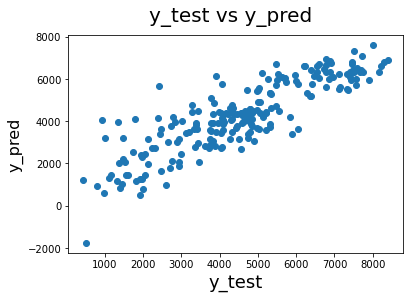

In [55]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,predicted_value2)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [56]:
x_t=x_train.iloc[:,0].values

In [57]:
#CALCULATING RESIDUALS

res=y_train - predicted_value1

Text(0.5, 0, 'Errors')

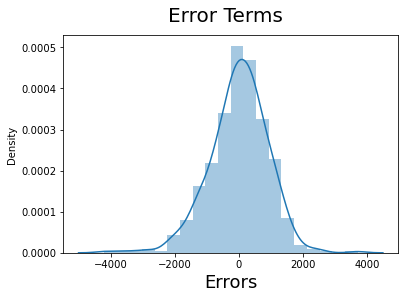

In [58]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

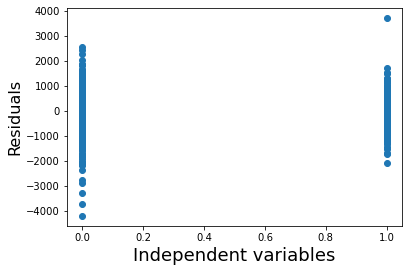

In [59]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(x_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [60]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value2))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7029


## We can see that the equation for best fitted line is:

### cnt = 4651.2646--2243.1276 X spring--342.5223 X summer-633.6558 X Winter-897.0311 X January-  619.1925 X September+564.5428 X Saturday --2635.2426 X Light rain_Light snow_Thunderstorm--764.2917 X Mist_cloudy+2160.8331 X yr-495.2774 X WorkingDay-1639.0134 X windspeed

## We can see the demand for bikes depends mainly on below variables:
### spring , summer , Winter , January , September, Saturday , Light rain_Light snow_Thunderstorm , Mist_cloudy , yr , WorkingDay , windspeed

### Demand decreases in spring and summer season and in the month of   January , November and during Light rain_Light snow_Thunderstorm and in  Mist_cloudy and when windspeed is high and its also working day.

### Demand increase in month of September ,WorkingDay and depends on yr(year) and when its saturdaySaturday.